In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PredictionPipelineV3 import *

/burg/pmg/users/az2732/conda_envs/pp3_burg4/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

pred = load_pred('/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Predictions/plt/TaskI/predictions/TaskI_sd005_nodes_mp2_robust.prediction.pkl')
nested_evals = pd.DataFrame(pred.nested_evals)
nested_evals

Loading prediction from /burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Predictions/plt/TaskI/predictions/TaskI_sd005_nodes_mp2_robust.prediction.pkl...
Detected 100 iterations, 10 nests (outer folds), 5 inner folds, and 3 train/test splits!


,nest,top_iteration,auc,group_by,result,params
0,0,79,0.647109,mean,<PredictionPipelineV3.Task.Task object at 0x15...,"{'subsample': 1, 'steps': ['AbundanceFilter', ..."
1,1,86,0.827381,mean,<PredictionPipelineV3.Task.Task object at 0x15...,"{'subsample': 1, 'steps': ['AbundanceFilter', ..."
2,2,55,0.629630,mean,<PredictionPipelineV3.Task.Task object at 0x15...,"{'subsample': 1, 'steps': ['AbundanceFilter', ..."
3,3,56,0.729965,mean,<PredictionPipelineV3.Task.Task object at 0x15...,"{'subsample': 1, 'steps': ['AbundanceFilter', ..."
4,4,56,0.729965,mean,<PredictionPipelineV3.Task.Task object at 0x15...,"{'subsample': 1, 'steps': ['AbundanceFilter', ..."
5,5,55,0.779337,mean,<PredictionPipelineV3.Task.Task object at 0x15...,"{'subsample': 1, 'steps': ['AbundanceFilter', ..."
6,6,37,0.820993,mean,<PredictionPipelineV3.Task.Task object at 0x15...,"{'subsample': 1, 'steps': ['AbundanceFilter', ..."
7,7,28,0.769983,mean,<PredictionPipelineV3.Task.Task object at 0x15...,"{'subsample': 1, 'steps': ['AbundanceFilter', ..."
8,8,93,0.759146,mean,<PredictionPipelineV3.Task.Task object at 0x15...,"{'subsample': 1, 'steps': ['AbundanceFilter', ..."
9,9,90,0.788265,mean,<PredictionPipelineV3.Task.Task object at 0x15...,"{'subsample': 1, 'steps': ['AbundanceFilter', ..."


{'steps': ['AbundanceFilter', 'FeatureSelector'], 'lasso_k': 0.01, 'feature_selection_method': ['lasso'], 'abundance_filter_threshold': 0.2}
Filtering features not present in more than 20% of samples...
Selected 17456 features!



/burg/pmg/users/az2732/conda_envs/pp3_burg4/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.863e-03, tolerance: 1.852e-03
  model = cd_fast.enet_coordinate_descent(
/burg/pmg/users/az2732/conda_envs/pp3_burg4/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.405e-03, tolerance: 1.852e-03
  model = cd_fast.enet_coordinate_descent(
/burg/pmg/users/az2732/conda_envs/pp3_burg4/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

LASSO- Selected 143 features in 17.083 seconds...

Fitting LightGBM CLASSIFICATION model...
LGBMClassifier(colsample_bytree=1, learning_rate=0.001, max_depth=10,
               min_child_samples=15, n_estimators=10000, n_jobs=2,
               num_leaves=10, random_state=73, reg_alpha=0.1, reg_lambda=0.1,
               subsample=1)

X_train- (77, 143)
y_train- (77, 1)


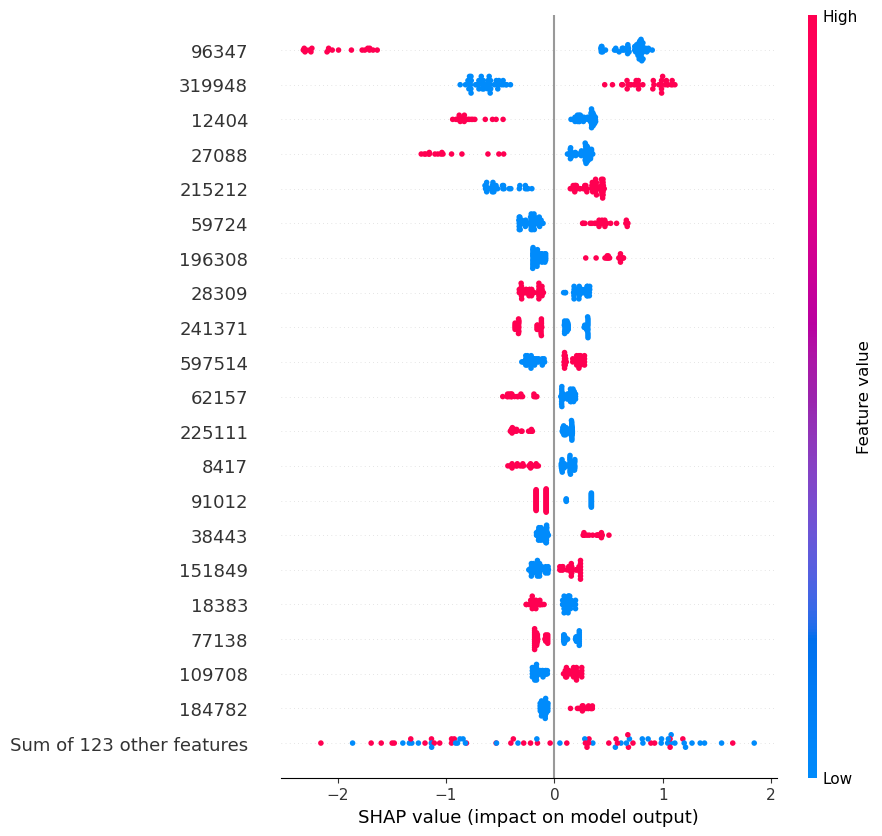

In [ ]:
# selecting best model basted on inner folds
best_iteration = pd.DataFrame(pred.nested_evals).sort_values(by='auc',ascending=False).iloc[0]['top_iteration']

# Remember, you can access the actual pipeline object using the `pred.pipes`` array
pipeline = pred.pipes[best_iteration]
print(pipeline.params)
pipeline

# Now you refit this pipeline (i.e. model) on the ENTIRE dataset
transformed_X_train = pipeline.fit_transform(pred.X,pred.y)		

explainer = shap.Explainer(pipeline[-1].model,transformed_X_train)
shap_values = explainer(transformed_X_train)
shap_series = pd.Series(np.abs(shap_values.values).mean(axis=0), index=shap_values.feature_names).sort_values(ascending=False)
top20shap = shap_series.head(20)
top20shap.to_csv('/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Predictions/plt/TaskI/predictions/TaskI_sd005.topshap.csv', header=None)
shap.plots.beeswarm(shap_values, max_display=21)

In [ ]:
# extract feature clusters

full_features = pd.read_csv('/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Predictions/plt/TaskI/TaskI_sd005.ncolor.csv', index_col=0)
full_features

,30004,30029,30006,30007,30025,30661,30030,31071,30038,30966,...,31268,31409,31446,31708,31731,31428,31777,32088,32015,32020
feature,,,,,,,,,,,,,,,,,,,,,
3378299,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3378298,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3378297,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3378296,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3378295,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2938675,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2938676,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2938677,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
clusters = pd.concat(top20shap.index.to_series().apply(lambda x: full_features[full_features.eq(full_features.loc[int(x),:]).all(axis=1)]).to_list())


In [31]:
copan_bed = pd.read_csv('/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Predictions/plt/TaskI/TaskI_sd005.bed', delimiter='\t', header=None)
copan_bed.columns = ['contig_name', 'start', 'end', 'node']
top_feature_bed = copan_bed.loc[copan_bed.node.isin(top20shap.index.to_series().astype(int))]
top_feature_bed.to_csv('/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Predictions/plt/TaskI/shap_features.bed', index=None, header=None, sep='\t')



In [28]:
import glob
def correct(e, s):
    fields = e.split()
    fields[1] = f'{s}_{fields[1]}'
    return ' '.join(fields)

gffs = glob.glob('/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Predictions/plt/TaskI/prokka/*.gff')
for gff in gffs:
    print(gff)
    sample = os.path.splitext(os.path.basename(gff))[0]
    with open(gff) as f:
        data = [correct(e, sample) if e.startswith('#') else f'{sample}_{e}' for e in f]
    with open(gff.replace('.gff', '.sampleprefix.gff'), 'w') as f:
        f.write('\n'.join(data))

/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Predictions/plt/TaskI/prokka/30344.gff
/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Predictions/plt/TaskI/prokka/30161.gff
/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Predictions/plt/TaskI/prokka/30891.gff
/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Predictions/plt/TaskI/prokka/32015.gff
/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Predictions/plt/TaskI/prokka/30038.gff
/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Predictions/plt/TaskI/prokka/30839.gff
/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Predictions/plt/TaskI/prokka/30434.gff
/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Predictions/plt/TaskI/prokka/31110.gff
/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Predictions/plt/TaskI/prokka/30758.gff
/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Predictions/plt/TaskI/prokka/30875.gff
/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Predictions/plt/TaskI/prokk

In [40]:
annofeats = glob.glob('/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Predictions/plt/TaskI/prokka/*.annotated_features.bed')
annofeats = pd.concat([pd.read_csv(e, sep='\t', header=None) for e in annofeats])
annofeats.drop([9], axis=1, inplace=True)
annofeats.columns = ['seqid', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'attributes', 'feature_start', 'feature_end', 'feature_name']
annofeats.sort_values(by='feature_name', inplace=True)
annofeats.to_csv('/burg/pmg/users/ic2465/Projects/MANU_copangraph/data/Predictions/plt/TaskI/prokka/all_annotated_features.bed', index=None)